In [2]:
!pip install tensorflow_macos

ERROR: Could not find a version that satisfies the requirement tensorflow_macos
ERROR: No matching distribution found for tensorflow_macos


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Dataset Numeric的副本.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Timestamp                                                                       32 non-null     object 
 1   Email address                                                                   32 non-null     object 
 2   How much free time do you have? (in hours)                                      32 non-null     int64  
 3   How insecure are you? (physical features, mental personality)                   32 non-null     int64  
 4   Average Sleep Time                                                              32 non-null     float64
 5   Relative stress daily (0 to 10)                                                 32 non-null     int64  
 6   Number of close frie

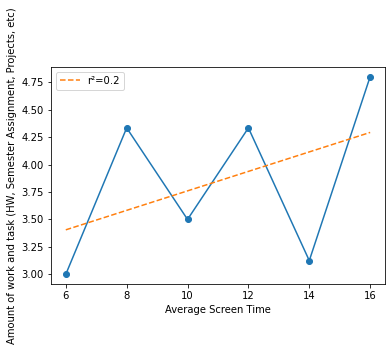

In [5]:
def single_line(x, y):
#     fx = []
#     fy = []
#     for i in df[x]:
#         if i not in fx:
#             fx.append(i)
#             temp = []
#             for idx,j in enumerate(df[y]):
#                 if (df[x])[idx] == i:
#                     temp.append(j)
#             fy.append(np.average(temp))
#     fx = sorted(fx)
#     fy = sorted(fy)
    xy = sorted(list(zip(df[x],df[y])))
    d = {}
    for i in xy:
        if i[0] not in d:
            d[i[0]] = []
    for j in xy:
        if j[0] in d:
            d[j[0]].append(j[1])
    for k in d:
        d[k] = np.average(d[k])
    fx, fy = zip(*d.items())

    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(fx,fy,linestyle="-", marker='o')
    
    def lin_reg():
        model = LinearRegression()
        fxa = np.array(fx).reshape(-1,1)
        fya = np.array(fy)
        model.fit(fxa,fya)
        r_squared = model.score(fxa,fya).round(2)
        plt.plot(fxa, model.coef_*fxa+model.intercept_, '--', label=f"r²={r_squared}")
        plt.legend()
    lin_reg()
    
single_line("Average Screen Time","Amount of work and task (HW, Semester Assignment, Projects, etc)")


In [9]:
def max_corr(df):
    dictionary = {}
    df = pd.read_csv(df)
    for i in df:
        if df[i].dtypes == 'object':
            del df[i]
    #df.iloc[:,0].to_list()
    count = 0
    for idj, i in enumerate(df):
        fx = []
        fy = []
        for j in df[i]:
            if j not in fx:
                fx.append(j)
                temp = []
                for idx,k in enumerate(df.iloc[:,idj+1]):
                    if (df[i])[idx] == j:
                        temp.append(k)
                fy.append(np.average(temp))
        #key, value = list(zip(*sorted(list(zip(fx,fy)))))
        dictionary[i] = sorted(list(zip(fx,fy)))
        print(idj)
        if idj == 9:
            break
    return dictionary

#     model = LinearRegression()
#     fx = np.array(fx).reshape(-1,1)
#     fy = np.array(fy)
#     model.fit(fx,fy)
#     r_squared = model.score(fx,fy)
#     return r_squared
max_corr("Dataset Numeric的副本.csv")

0
1
2
3
4
5
6
7
8
9


{'How much free time do you have? (in hours)': [(1, 1.0),
  (2, 5.0),
  (3, 4.428571428571429),
  (4, 5.375),
  (5, 5.75),
  (6, 2.8),
  (8, 5.0)],
 'How insecure are you? (physical features, mental personality)': [(0, 5.5),
  (1, 5.5),
  (2, 8.166666666666666),
  (3, 6.785714285714286),
  (4, 8.5),
  (5, 6.333333333333333),
  (6, 6.9),
  (7, 6.5),
  (8, 4.833333333333333),
  (9, 5.5)],
 'Average Sleep Time': [(4.5, 7.2),
  (5.5, 7.0),
  (6.5, 5.0),
  (7.5, 5.428571428571429),
  (8.5, 4.0),
  (9.5, 2.0)],
 'Relative stress daily (0 to 10)': [(1, 4.0),
  (2, 7.5),
  (3, 6.333333333333333),
  (4, 6.0),
  (5, 3.857142857142857),
  (6, 4.5),
  (7, 4.181818181818182),
  (8, 5.0),
  (9, 6.0),
  (10, 5.0)],
 'Number of close friends you have ( friends who you are often in contact with )': [(0,
   3.5),
  (2, 2.5),
  (3, 2.5),
  (4, 3.0),
  (5, 2.2222222222222223),
  (6, 3.3333333333333335),
  (7, 3.0),
  (8, 1.6666666666666667),
  (9, 1.0),
  (10, 2.0)],
 'Rate your experience in online class

In [ ]:
-------------------------------------------Break-----------------------------------------

In [75]:
#multi variate linear regression
y = df["DAILY_STRESS"]
x = df["SOCIAL_NETWORK"]
yn = []
xn = []
for idx,i in enumerate(x):
    if i not in xn:
        xn.append(i)
        temp = []
        for j in y:
            if x[idx] == i:
                temp.append(j)
        yn.append(temp)
xna = np.array(xn).reshape(-1,1)
yna = np.array(yn)
model = LinearRegression()
model.fit(xna,yna)
print(model.score(xna,yna))
#plt.plot(xna, np.sum((model.coef_ * xna),axis=1) + model.intercept_)

1.0


In [29]:
#multi line plot
def single_line(x, y):
    xy = sorted(list(zip(df[x],df[y])))
    d = {}
    for i in xy:
        if i[0] not in d:
            d[i[0]] = []
    for j in xy:
        if j[0] in d:
            d[j[0]].append(j[1])
    for k in d:
        d[k] = sum(d[k])/len(d[k])
    #return d
    fx = list(d.keys())
    fy = list(d.values())
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(fx,fy)
#visualize("DAILY_SHOUTING","DAILY_STRESS")


#multi_line("DAILY_SHOUTING","DAILY_STRESS", "SOCIAL_NETWORK", "SLEEP_HOURS")